### Derived from:
https://rapidapi.com/blog/google-news-api-python/
The API is limited to 100 results at a time, and 3 requests per hour, according to the blog.

https://data-science-blog.com/blog/2018/11/04/sentiment-analysis-using-python/

To avoid formatting issues, please open the output csv in a text editor, and select delimit by ~. I chose this delimiter because many other commonly used delimiters (, | ; :) appear in news titles and would interfere with column delimiting.

### API call to Google News to grab headlines

In [349]:
#! python
"""
Description:
  This script pulls a list of items from the Google News API, with the topic 'covid-19'
  
Output: Csv file with article date, publisher, title, link

"""

#import libraries used below
import requests
import json
from datetime import datetime
from pathlib import Path

# This is where the generated html will be saved (in the local directory)
#  More information about the Path function is described at https://realpython.com/python-pathlib/
data_folder = Path("~")
outputFile = "covid_google_news_save.csv"

# datetime object containing current date and time
now = datetime.now()

# Get the date and time in the format YYYY-mm-dd H:M:S
dt_string = now.strftime("%Y-%m-%d %H:%M:%S")


# Set to 1 to show details along the way for debugging purposes
debug=1


url = "https://google-news.p.rapidapi.com/v1/topic_headlines"

querystring = {"lang":"en","country":"US","topic":"CAAqIggKIhxDQkFTRHdvSkwyMHZNREZqY0hsNUVnSmxiaWdBUAE"}

headers = {
    'x-rapidapi-key': "5820bf39c3msh66e2e88970341ddp155860jsn1e7ee7cf25a0",
    'x-rapidapi-host': "google-news.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

json_dictionary = response.json()

with open(outputFile, "a", encoding="utf-8",) as f:
        f.write("Date" + "~" + "Publisher" + "~" + "Title" + "~" + "Link" + "\n")
        
NewsArticlesList = []

# Loop through dictionary keys to access each article
for item in json_dictionary['articles']:
    # Pull the title for this article into a variable.
    title = item['title']
    timestamp = item['published']
    date = item['published'].split(', ')[1][0:11]
    publisher = item['source']['title']
    link = item['link']
    
    if debug>0:
        print("Title: ", title, "Time: ", timestamp)
        
    # append to list
    NewsArticlesList.append([date, publisher, title, link])
        
    # write to csv
    headline = str(date) + "~" + str(publisher) + "~" +  str(title) + "~" + str(link) + "\n"

    with open(outputFile, "a", encoding="utf-8") as f:
        f.write(headline)

Title:  Biden Praises Senate Passage Of 'Desperately Needed' COVID-19 Relief Bill - NPR Time:  Sat, 06 Mar 2021 23:49:44 GMT
Title:  Covid-19 Live News: Updates on the Virus, Vaccines and Variants - nytimes.com Time:  Sun, 07 Mar 2021 00:42:00 GMT
Title:  Some children's hospitals see a surge in rare Covid-19 complication MIS-C - CNN Time:  Sat, 06 Mar 2021 17:09:00 GMT
Title:  COVID stimulus bill 'big win for all New Yorkers': Schumer - New York Daily News Time:  Sat, 06 Mar 2021 23:39:00 GMT
Title:  State COVID-19 Hospitalizations Lowest Since December 7 - Spectrum News NY1 Time:  Sat, 06 Mar 2021 18:28:00 GMT
Title:  Need a job? NYC is hiring 2,000 to fill positions at coronavirus vaccination sites. - silive.com Time:  Sat, 06 Mar 2021 23:15:11 GMT
Title:  NYC Moviegoers Return to Theaters in Person - Spectrum News NY1 Time:  Sat, 06 Mar 2021 03:31:00 GMT
Title:  NHS entitlements: migrant health guide – GOV.UK (www.gov.uk) - GOV.UK Time:  Fri, 29 Jan 2016 10:45:55 GMT
Title:  WHO: T

In [1]:
# if reading in from a file
import pandas as pd
# we will store a raw copy and also a copy that we will clean
rawDf=pd.read_csv('covid_google_news.csv')
NewsDf = pd.read_csv('covid_google_news.csv')
NewsDf.columns
# end read

Index(['Date', 'Publisher', 'Title', 'Link'], dtype='object')

In [203]:
# if taking in at the same time as the API
import pandas as pd
# convert news articles list into dataframe
# we will store a raw copy and also a copy that we will clean
rawDf=pd.DataFrame(NewsArticlesList,columns=['Date', 'Publisher', 'Title', 'Link'])
NewsDf=pd.DataFrame(NewsArticlesList,columns=['Date', 'Publisher', 'Title', 'Link'])

In [2]:
#NewsDf['publisher'].value_counts()
NewsDf['Publisher'].value_counts()

The New York Times         8
The Wall Street Journal    6
CNN                        6
NPR                        5
USA TODAY                  5
                          ..
LA Daily News              1
WPXI Pittsburgh            1
Patch.com                  1
silive.com                 1
ESPN                       1
Name: Publisher, Length: 106, dtype: int64

### Cleaning Data

In [3]:
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [4]:
# remove punctuation
NewsDf['Title'] = NewsDf['Title'].str.replace('[^\w\s]','')

In [5]:
NewsDf['Title']

0      Senate Democrats Pass 19 Trillion Covid19 Reli...
1      Highlights of the 19T COVID bill nearing final...
2      Some childrens hospitals see a surge in rare C...
3      Covid19 Live News Updates on the Virus Vaccine...
4      Latest coronavirus updates in New York Saturda...
                             ...                        
166    LIVE BLOG Greensboro FEMA COVID19 vaccination ...
167    Oregon Health Authority reports 3 additional d...
168    Montana adds 143 new cases of COVID19 two more...
169    US Senate passes Bidens COVID relief bill incl...
170    GOP votes in unison against COVID19 relief bil...
Name: Title, Length: 171, dtype: object

In [55]:
# remove stopwords
stop = stopwords.words('english')
stop.append('the') # adding this stop word
NewsDf['Title'] = NewsDf['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# make all words lowercase
NewsDf["Title"].str.lower()
NewsDf['Title'][1:10]

1    highlight 19t covid bill near final passag ass...
2    children hospit see surg rare covid19 complic ...
3    covid19 live new updat viru vaccin variant new...
4    latest coronaviru updat new york saturday marc...
5    nyc moviego return theater person spectrum new...
6    covid cluster hit citi workplac As frontlin em...
7    new york strip club cant get covid relief loan...
8    nh entitl migrant health guid govuk wwwgovuk g...
9    moderna covid19 mrna1273 vaccin need know worl...
Name: Title, dtype: object

In [56]:
# stemming
# make a copy before stemming
noStemming = NewsDf.copy()
st = PorterStemmer()
NewsDf['Title'] = NewsDf['Title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
NewsDf['Title'][1:10]

1    highlight 19t covid bill near final passag ass...
2    children hospit see surg rare covid19 complic ...
3    covid19 live new updat viru vaccin variant new...
4    latest coronaviru updat new york saturday marc...
5    nyc moviego return theater person spectrum new...
6    covid cluster hit citi workplac As frontlin em...
7    new york strip club cant get covid relief loan...
8    nh entitl migrant health guid govuk wwwgovuk g...
9    moderna covid19 mrna1273 vaccin need know worl...
Name: Title, dtype: object

### Get polarity and subjectivity of the headlines

In [8]:
# documentation on polarity [-1, 1] and subjectivity [0,1]
# https://textblob.readthedocs.io/en/dev/quickstart.html


# polarity: if the sentiment is positive or negative
# subjectivity score: how subjective is the text

In [57]:
def polarity(x):
    return TextBlob(x).sentiment.polarity

def subjectivity(x):
    return TextBlob(x).sentiment.subjectivity

In [58]:
NewsDf['polarity'] = NewsDf['Title'].apply(polarity)
NewsDf['subjectivity'] = NewsDf['Title'].apply(subjectivity)
 
NewsDf.polarity.head()

NewsDf.subjectivity.head()

0    0.000000
1    0.700000
2    0.900000
3    0.469697
4    0.603030
Name: subjectivity, dtype: float64

In [59]:
polarity_df = NewsDf.groupby('Publisher', as_index=False)['polarity'].mean()
polarity_df = polarity_df.sort_values('polarity', ascending = False)

In [60]:
subjective_df = NewsDf.groupby('Publisher', as_index=False)['subjectivity'].mean()
subjective_df = subjective_df.sort_values('subjectivity', ascending = False)

In [61]:
sentiment_join = pd.merge(polarity_df, subjective_df, how = 'outer', on='Publisher')

In [62]:
# get 7 highest and 7 lowest average polarity scores by news outlet
high_p = sentiment_join.sort_values('polarity',ascending = False)[0:7]
low_p = sentiment_join.sort_values('polarity',ascending = True)[0:7]
extremes_p = pd.concat([low_p, high_p])
extremes_p = extremes_p.sort_values('polarity', ascending = False)

Text(0.25, 0.05, '*Based on Average Polarity of Headlines')

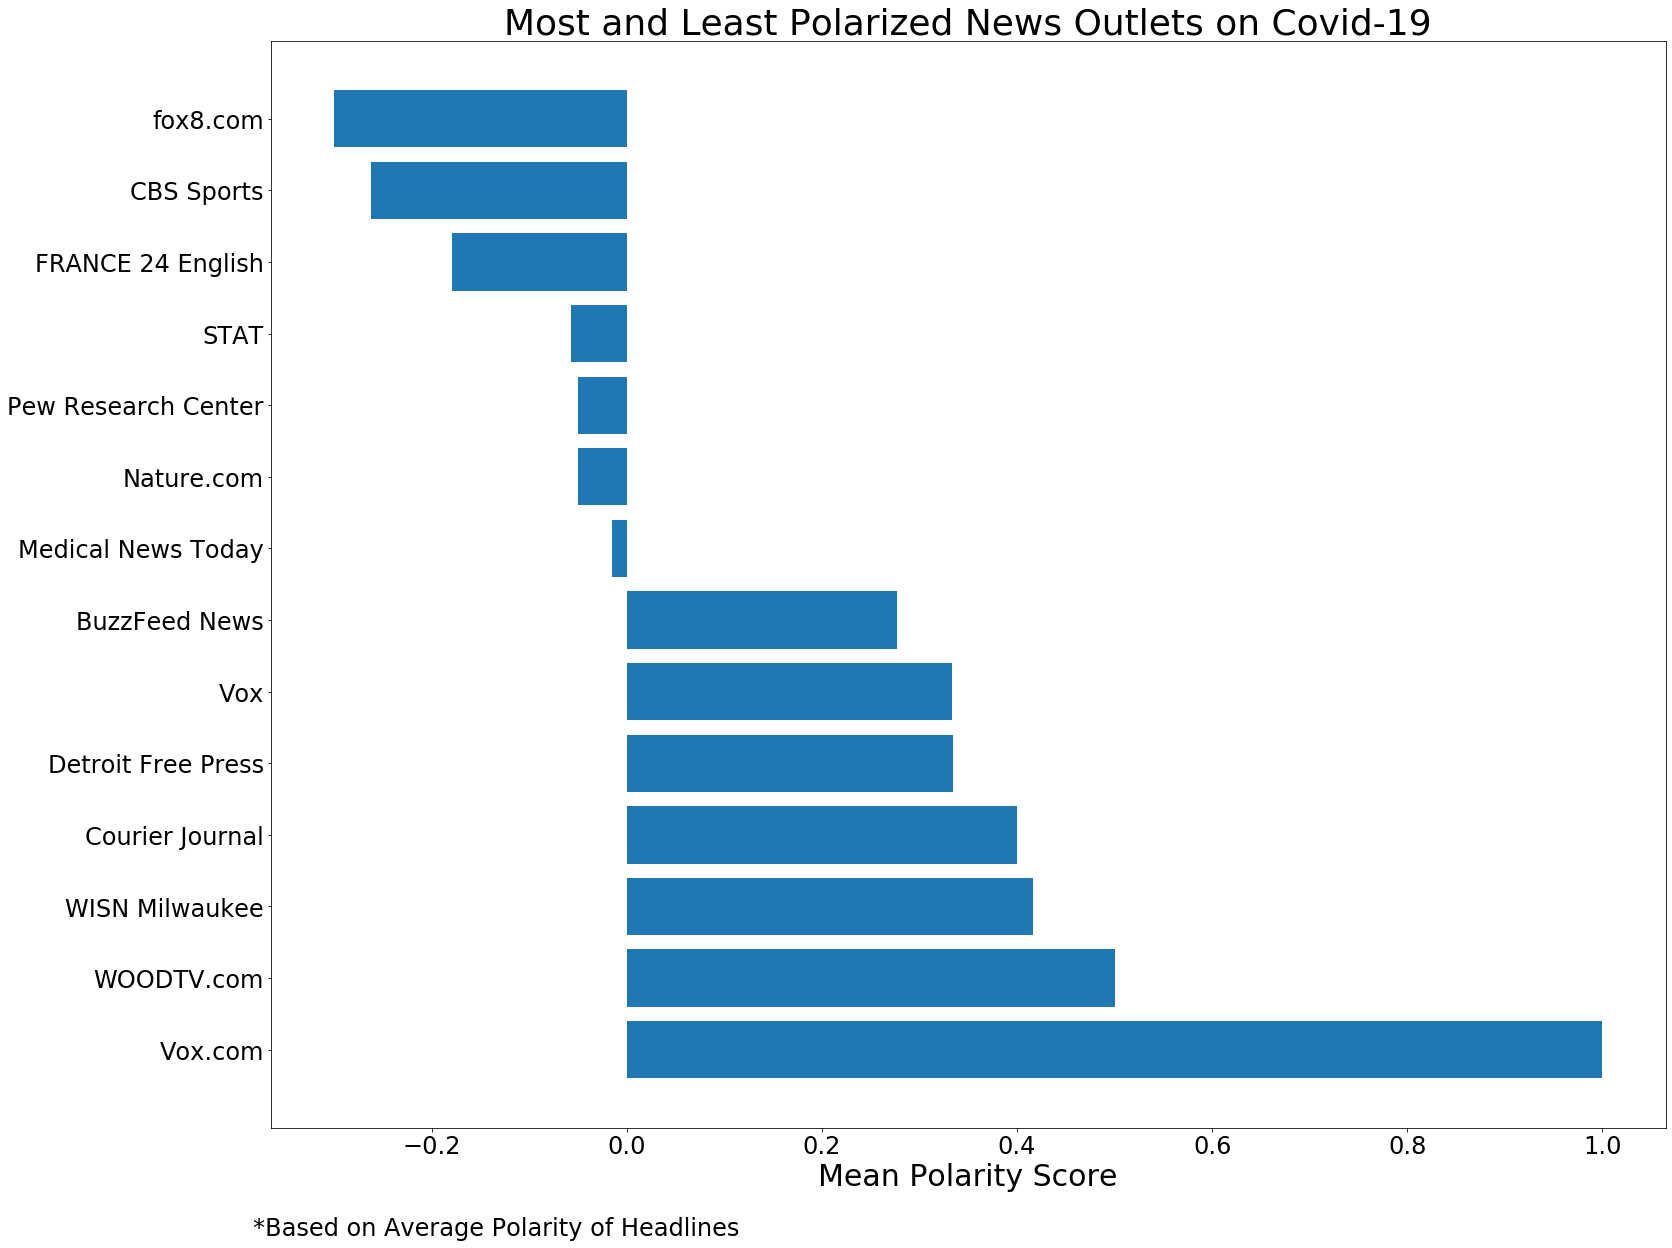

In [63]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
fig = plt.figure(figsize=(25, 20))
plt.barh(y='Publisher', width='polarity', data=extremes_p)
plt.title('Most and Least Polarized News Outlets on Covid-19',fontsize = 36)
plt.xlabel('Mean Polarity Score',fontsize=30)
txt="*Based on Average Polarity of Headlines"
fig.text(0.25, 0.05, txt, ha='center')

In [64]:
# get most subjective news outlets
high_s = sentiment_join.sort_values('subjectivity',ascending = False)[0:7]

Text(0.25, -0.05, '*Based on Average Subjectivity of Headlines')

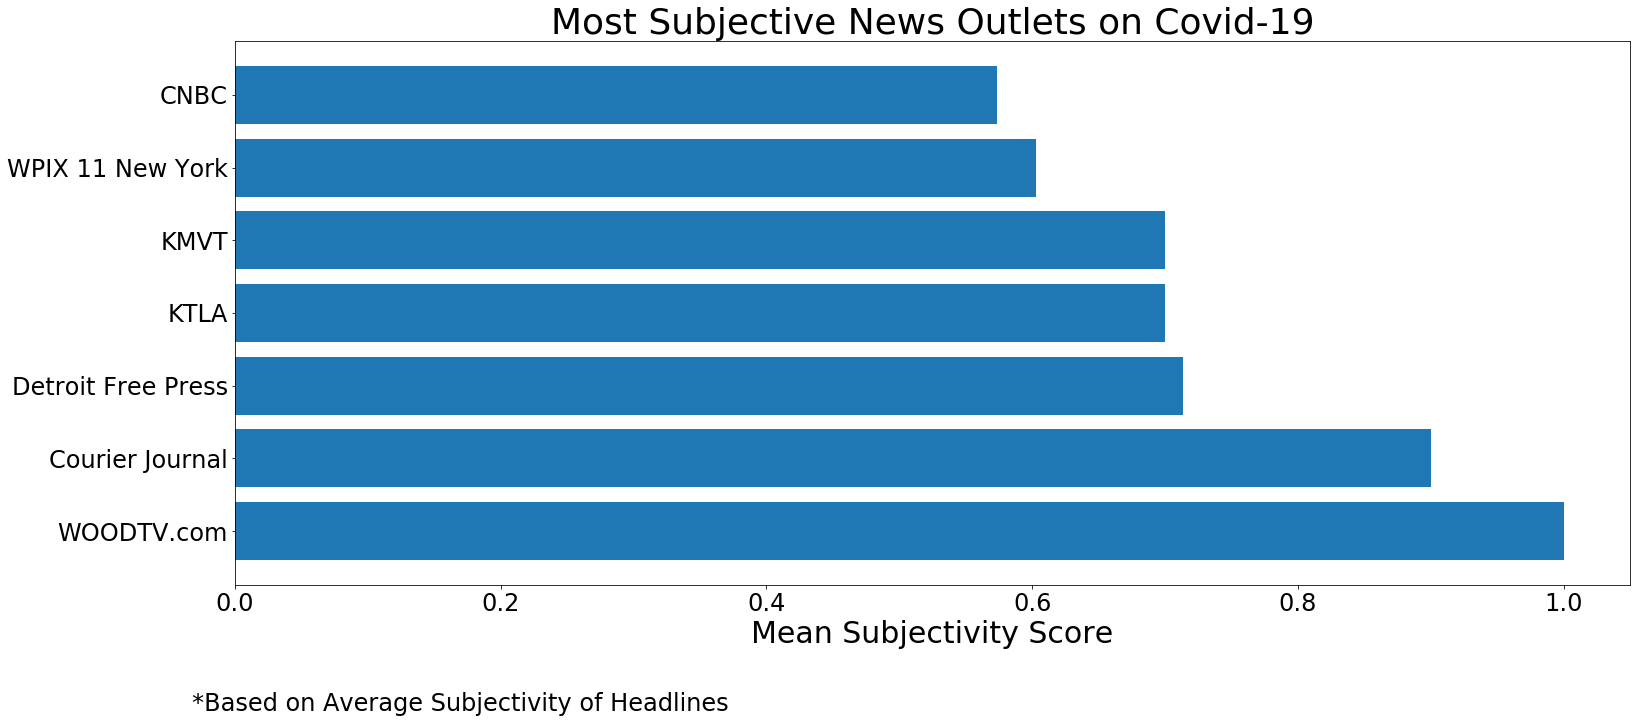

In [65]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
fig = plt.figure(figsize=(25, 10))
plt.barh(y='Publisher', width='subjectivity', data=high_s)
plt.title('Most Subjective News Outlets on Covid-19',fontsize = 36)
plt.xlabel('Mean Subjectivity Score', fontsize = 30)
txt="*Based on Average Subjectivity of Headlines"
fig.text(0.25, -.05, txt, ha='center')

### Word cloud for high polarity vs. low polarity titles

In [66]:
stoplist = set(stopwords.words("english"))

def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stoplist,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=16)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [67]:
## get the titles corresponding to news outlets that have on average high polarity and on average low polarity
#high_p_titles = list(noStemming[noStemming['Publisher'].isin(high_p['Publisher'])]['Title'])
#low_p_titles = list(noStemming[noStemming['Publisher'].isin(low_p['Publisher'])]['Title'])

In [68]:
# 20 Titles with highest polarity, and 20 with lowest polarity (regardless of news outlet)

high_p_titles = list(NewsDf.sort_values('polarity', ascending = False)['Title'][0:20])

low_p_titles = list(NewsDf.sort_values('polarity', ascending = True)['Title'][0:20])

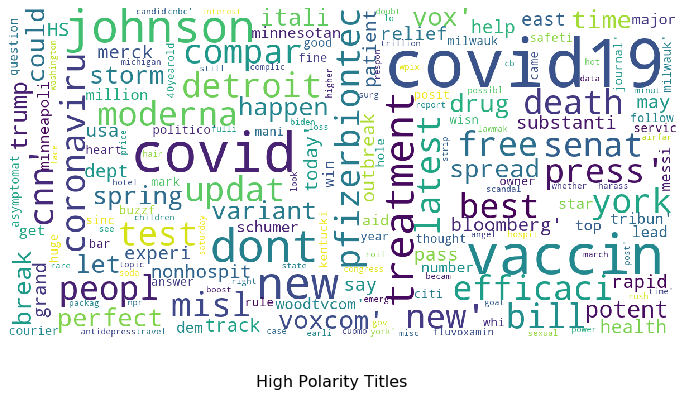

In [69]:
show_wordcloud(high_p_titles, title = 'High Polarity Titles')

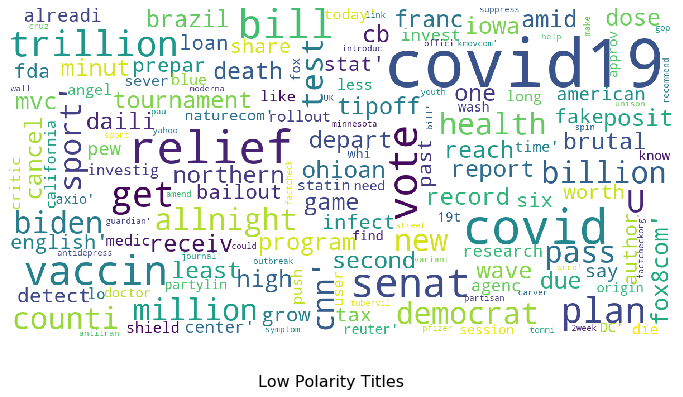

In [70]:
show_wordcloud(low_p_titles, title = 'Low Polarity Titles')

In [71]:
# get the word list 
# split each title into single words and get word count across titles
def single_words(TitleList):
    allWords = []
    for x in TitleList:
        allWords.extend(x.split())
    return allWords

# get the freqency of each word and put it into a dictionary, key = word, value = frequency
def getFrequenciesDict(allWords):
    wordFreqencies = [allWords.count(w) for w in allWords]
    return dict(list(zip(allWords,wordFreqencies)))

# Sort a dictionary of word-frequency pairs in
# order of descending frequency
def sortFreqDict(freqdict):
    sortedDict = sorted(freqdict.items(), key=lambda x: x[1], reverse = True)
    return sortedDict

In [72]:
high_p_words = single_words(high_p_titles)
high_p_freq = getFrequenciesDict(high_p_words)
high_p_freq = sortFreqDict(high_p_freq)
# Show top 20 most frequent words of news outlets with high average polarity
high_p_freq[0:20]

[('covid19', 9),
 ('vaccin', 6),
 ('covid', 6),
 ('new', 6),
 ('dont', 4),
 ('johnson', 4),
 ('treatment', 3),
 ('york', 3),
 ('best', 2),
 ('misl', 2),
 ('compar', 2),
 ('efficaci', 2),
 ('moderna', 2),
 ('pfizerbiontec', 2),
 ('coronaviru', 2),
 ('cnn', 2),
 ('time', 2),
 ('test', 2),
 ('senat', 2),
 ('bill', 2)]

In [73]:
low_p_words = single_words(low_p_titles)
low_p_freq = getFrequenciesDict(low_p_words)
low_p_freq = sortFreqDict(low_p_freq)
# Show top 20 most frequent words of news outlets with low average polarity
low_p_freq[0:20]

[('covid19', 14),
 ('covid', 6),
 ('bill', 5),
 ('relief', 5),
 ('19', 4),
 ('vaccin', 4),
 ('senat', 4),
 ('vote', 4),
 ('sport', 3),
 ('get', 3),
 ('plan', 3),
 ('trillion', 3),
 ('million', 2),
 ('health', 2),
 ('test', 2),
 ('1', 2),
 ('cnn', 2),
 ('new', 2),
 ('To', 2),
 ('billion', 2)]

Text(0.5, 0, 'Frequency')

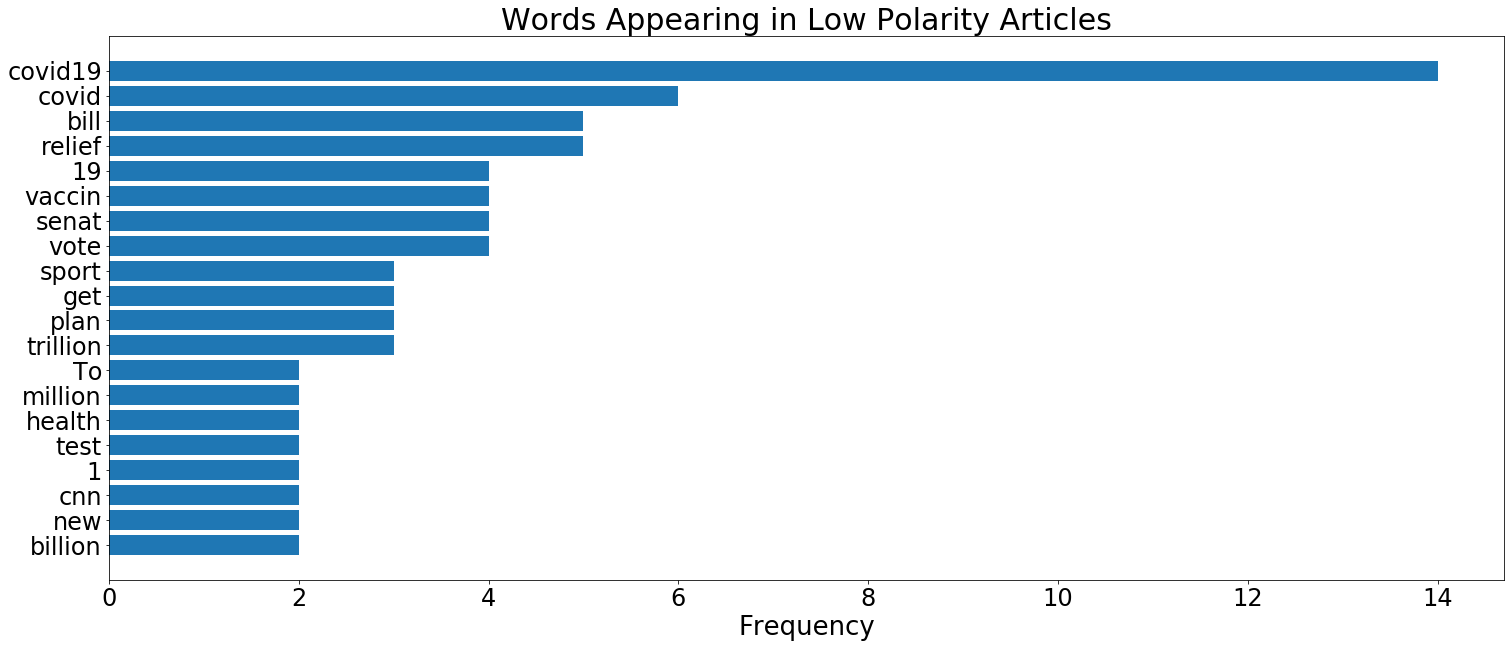

In [74]:
low_p_freq_df = pd.DataFrame(low_p_freq[0:20], columns=['word', 'frequency'])
low_p_freq_df = low_p_freq_df.sort_values('frequency',ascending = True)
plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(25, 10))
plt.barh(y='word', width='frequency', data=low_p_freq_df)
plt.title('Words Appearing in Low Polarity Articles',fontsize = 30)
plt.xlabel('Frequency', fontsize = 26)

Text(0.5, 0, 'Frequency')

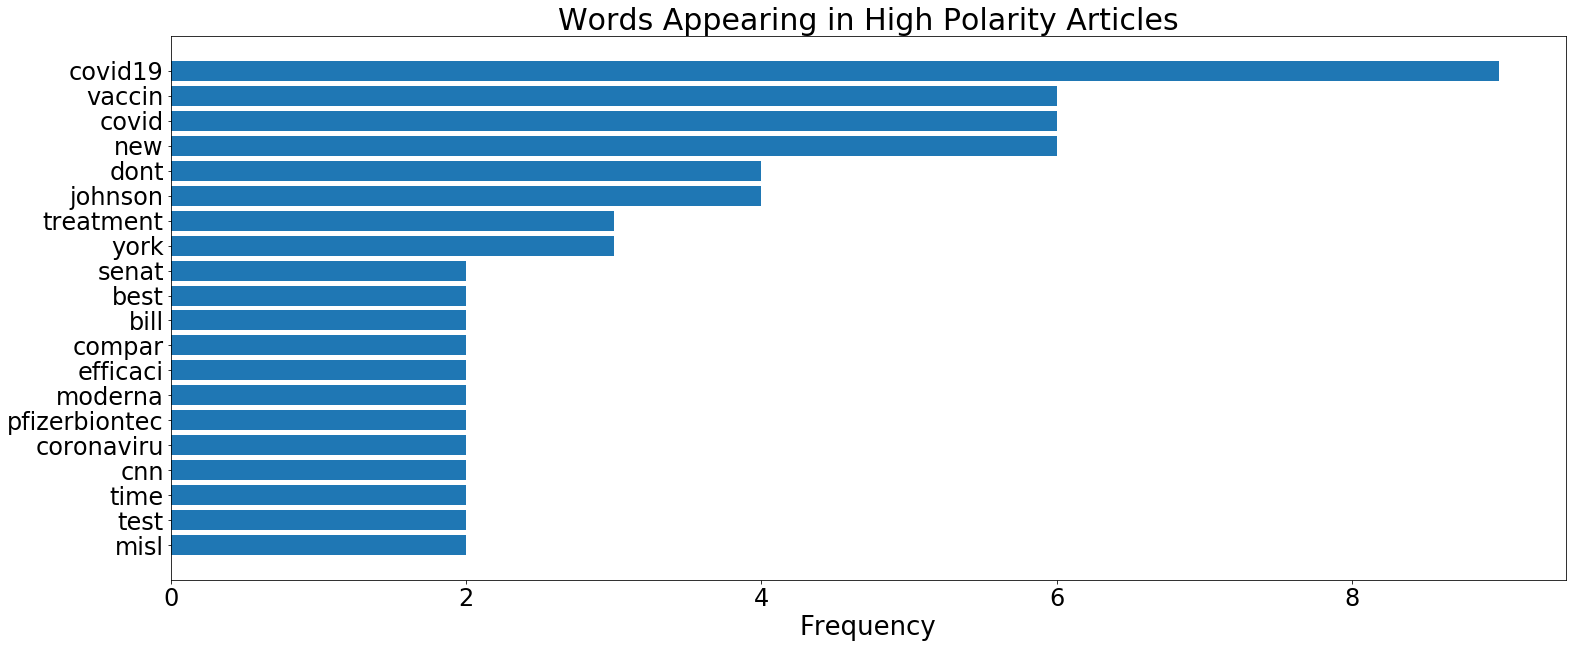

In [75]:
high_p_freq_df = pd.DataFrame(high_p_freq[0:20], columns=['word', 'frequency'])
high_p_freq_df = high_p_freq_df.sort_values('frequency',ascending = True)
plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(25, 10))
plt.barh(y='word', width='frequency', data=high_p_freq_df)
plt.title('Words Appearing in High Polarity Articles',fontsize = 30)
plt.xlabel('Frequency', fontsize = 26)

#### Inspect titles from a specific news outlet

In [117]:
NewsDf.loc[NewsDf['Publisher'] == 'CNBC']

,Date,Publisher,Title,Link,Unnamed: 4,Unnamed: 5,polarity,subjectivity
11,6-Mar-21,CNBC,senat pass 19 trillion covid relief bill hous ...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,0.000000,1.000000
13,4-Mar-21,CNBC,compani worst number suddenli best stock jim c...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,0.000000,0.650000
22,5-Mar-21,CNBC,airlin chang flight destin devast shock covid ...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,0.000000,0.000000
94,5-Mar-21,CNBC,new york lawmak strip gov cuomo emerg covid po...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,0.318182,0.643939
